In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torchvision

# training

In [2]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')
# Print lengths of feature tensors
print(f"Number of training Day 7 features: {len(train_day7_feats)}")
print(f"Number of training Day 10 features: {len(train_day10_feats)}")
# Print shapes of feature tensors
print(f"Shape of training Day 7 features: {train_day7_feats.shape}")
print(f"Shape of training Day 10 features: {train_day10_feats.shape}")




Number of training Day 7 features: 130
Number of training Day 10 features: 130
Shape of training Day 7 features: torch.Size([130, 512])
Shape of training Day 10 features: torch.Size([130, 512])


C:\Users\k54739\AppData\Local\Temp\ipykernel_23212\3492997598.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [3]:
# Ensure the shapes are consistent
assert train_day7_feats.shape == train_day10_feats.shape, "Feature tensors must have the same shape."

In [4]:
train_day7_feats.shape

torch.Size([130, 512])

In [30]:
import torch
import torch.nn.functional as F

# Assuming train_day7_feats and train_day10_feats are torch tensors with shape [130, 512]
# Move to the correct device if needed (e.g., GPU)

# Compute cosine similarity for each pair of feature vectors across day 7 and day 10
cosine_similarity = F.cosine_similarity(train_day7_feats, train_day10_feats, dim=1)  # Shape: [130]

# Convert cosine similarity to cosine distance
cosine_distances = 1 - cosine_similarity  # Shape: [130]

print(cosine_distances)
print(cosine_distances.min())
print(cosine_distances.max())


tensor([0.5880, 0.7093, 0.6559, 0.6997, 0.4229, 0.7312, 0.4352, 0.4787, 0.6559,
        0.2913, 0.6959, 0.6575, 0.6444, 0.6218, 0.6580, 0.7395, 0.5107, 0.7644,
        0.6774, 0.5982, 0.7426, 0.5138, 0.5830, 0.7501, 0.7628, 0.6736, 0.7110,
        0.7674, 0.6414, 0.4260, 0.8236, 0.5344, 0.6930, 0.7430, 0.7041, 0.6671,
        0.4982, 0.5235, 0.6558, 0.4406, 0.6724, 0.5822, 0.4679, 0.6856, 0.5288,
        0.5875, 0.6262, 0.6355, 0.3031, 0.6908, 0.6476, 0.7415, 0.5761, 0.3338,
        0.5630, 0.4760, 0.7289, 0.6408, 0.7405, 0.7604, 0.4700, 0.6241, 0.5748,
        0.5667, 0.6754, 0.3722, 0.7009, 0.5669, 0.4328, 0.4260, 0.8190, 0.4274,
        0.4175, 0.5257, 0.2941, 0.7312, 0.4310, 0.6867, 0.8714, 0.5887, 0.7310,
        0.5747, 0.6185, 0.6248, 0.3933, 0.2495, 0.5004, 0.7483, 0.6519, 0.7271,
        0.4719, 0.3401, 0.6500, 0.4878, 0.6590, 0.7822, 0.4397, 0.4886, 0.7895,
        0.6030, 0.4026, 0.7237, 0.7225, 0.5592, 0.6866, 0.4557, 0.6058, 0.5481,
        0.6582, 0.6437, 0.8111, 0.5641, 

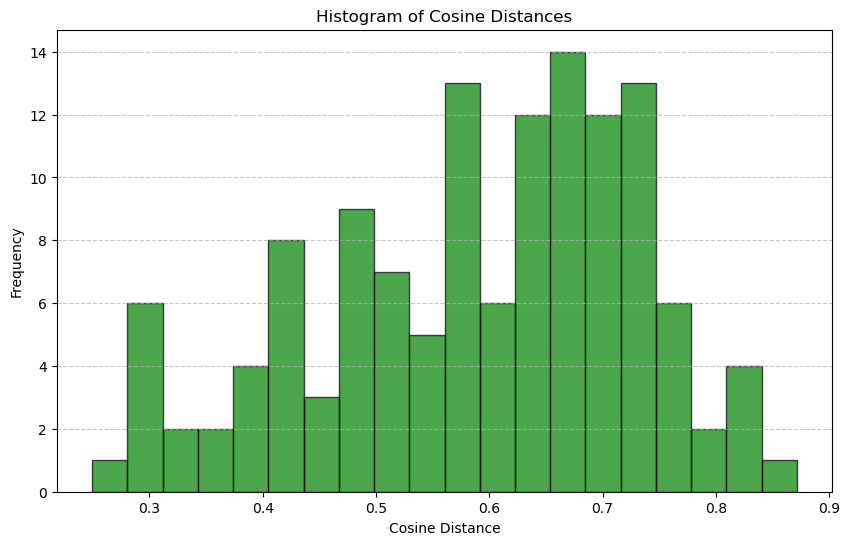

In [6]:
import matplotlib.pyplot as plt

# Convert tensor to NumPy array for plotting
cosine_distances_np = cosine_distances.cpu().numpy()  # Move to CPU if on GPU, then convert to NumPy

# Plot the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(cosine_distances_np, bins=20, color='g', alpha=0.7, edgecolor='black')  # Histogram with 20 bins
plt.title("Histogram of Cosine Distances")
plt.xlabel("Cosine Distance")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add a grid to y-axis
plt.show()


In [7]:
# Prepare data for training
features = train_day7_feats  # Input: Day 7 feature vectors (Shape: [130, 512])
labels = cosine_distances   
print(f"Shape of input features (Day 7): {features.shape}")
print(f"Shape of target labels (Delta): {labels.shape}")


Shape of input features (Day 7): torch.Size([130, 512])
Shape of target labels (Delta): torch.Size([130])


In [8]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

features_tensor_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute min and max of the labels
labels_min = cosine_distances.min()  # Minimum value in the tensor
labels_max = cosine_distances.max()  # Maximum value in the tensor

# Apply Min-Max scaling
labels_scaled = (cosine_distances - labels_min) / (labels_max - labels_min)

# Print the scaled labels
print("Min-Max Scaled Labels:")
print(labels_scaled)

# Verify the range of scaled labels
print("Scaled Min:", labels_scaled.min().item())
print("Scaled Max:", labels_scaled.max().item())



Min-Max Scaled Labels:
tensor([0.5443, 0.7392, 0.6534, 0.7239, 0.2789, 0.7745, 0.2986, 0.3685, 0.6534,
        0.0671, 0.7177, 0.6560, 0.6349, 0.5987, 0.6568, 0.7879, 0.4199, 0.8280,
        0.6880, 0.5607, 0.7928, 0.4249, 0.5362, 0.8050, 0.8253, 0.6819, 0.7421,
        0.8328, 0.6301, 0.2838, 0.9231, 0.4581, 0.7131, 0.7934, 0.7310, 0.6715,
        0.3999, 0.4405, 0.6532, 0.3073, 0.6799, 0.5349, 0.3512, 0.7012, 0.4490,
        0.5435, 0.6057, 0.6207, 0.0862, 0.7096, 0.6401, 0.7911, 0.5252, 0.1356,
        0.5041, 0.3642, 0.7708, 0.6292, 0.7894, 0.8215, 0.3546, 0.6024, 0.5230,
        0.5100, 0.6847, 0.1973, 0.7258, 0.5103, 0.2947, 0.2838, 0.9158, 0.2860,
        0.2701, 0.4441, 0.0717, 0.7746, 0.2919, 0.7030, 1.0000, 0.5453, 0.7742,
        0.5229, 0.5933, 0.6034, 0.2313, 0.0000, 0.4034, 0.8021, 0.6470, 0.7680,
        0.3576, 0.1457, 0.6440, 0.3832, 0.6585, 0.8566, 0.3058, 0.3844, 0.8682,
        0.5683, 0.2462, 0.7625, 0.7606, 0.4979, 0.7028, 0.3316, 0.5729, 0.4800,
        0.6571, 0

# Convert features and labels to NumPy arrays
features_np = features.numpy()  # Shape: [130, 512]
labels_np = labels.numpy()      # Shape: [130, 512]

day10_feats_np = train_day10_feats.numpy()

import matplotlib.pyplot as plt
import numpy as np

# Convert features and labels to NumPy arrays
features_np = features.numpy()  # Shape: [130, 512]
labels_np = labels.numpy()      # Shape: [130, 512]

# Plot Features (Day 7)
plt.figure(figsize=(12, 6))
plt.imshow(features_np, aspect='auto', cmap='viridis')
plt.colorbar(label="Feature Value")
plt.title("Features (Day 7)")
plt.xlabel("Feature Dimensions")
plt.ylabel("Data Points")
plt.show()

# Plot Features (Day 7)
plt.figure(figsize=(12, 6))
plt.imshow(day10_feats_np, aspect='auto', cmap='viridis')
plt.colorbar(label="Feature Value")
plt.title("Features (Day 7)")
plt.xlabel("Feature Dimensions")
plt.ylabel("Data Points")
plt.show()

# Plot Labels (Delta)
plt.figure(figsize=(12, 6))
plt.imshow(labels_np, aspect='auto', cmap='coolwarm')
plt.colorbar(label="Delta Value")
plt.title("Labels (Delta: Day 10 - Day 7)")
plt.xlabel("Feature Dimensions")
plt.ylabel("Data Points")
plt.show()


import matplotlib.pyplot as plt

# Flatten features_np to 1D for histogram
labels_flat = labels_np.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(labels_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt

# Flatten features_np to 1D for histogram
features_flat = features_np.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(features_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Scaled

import numpy as np

# Compute Min-Max Scaling for Features
features_min = features_np.min(axis=0)  # Minimum value for each feature
features_max = features_np.max(axis=0)  # Maximum value for each feature
features_scaled = (features_np - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = labels_np.mean(axis=0)  # Mean for each label dimension
labels_std = labels_np.std(axis=0)  # Standard deviation for each label dimension
labels_normalized = (labels_np - labels_mean) / labels_std  # Normalize to Z-scores

# Print shapes to confirm
print(f"Features Scaled Shape: {features_scaled.shape}")  # Should be [130, 512]
print(f"Labels Normalized Shape: {labels_normalized.shape}")  # Should be [130, 512]


import matplotlib.pyplot as plt

# Flatten features_np to 1D for histogram
features_scaled_flat = features_scaled.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(features_scaled_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



labels_normalized_flat = labels_normalized.flatten()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(labels_normalized_flat, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Feature Values (Flattened)")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

input_dim = features_scaled.shape[1] 
print(input_dim) # 512
output_dim = labels_normalized.shape[1]
print(output_dim) 

In [9]:
import torch.nn as nn

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()  # Output size changed to 1
        )
        
    def forward(self, x):
        return self.model(x).squeeze(1)  # Squeeze to get shape [batch_size]


In [10]:
model = FeaturePredictor()
criterion = nn.MSELoss()

In [11]:
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset

In [12]:
from torch.utils.data import TensorDataset
optimizer_class = torch.optim.Adam

In [13]:

class EarlyStopping:
    def __init__(self, patience=10, delta=0.0):
        """
        Args:
            patience (int): How many epochs to wait after the last validation loss improvement.
            delta (float): Minimum change in the validation loss to qualify as an improvement.
        """
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.no_improvement_epochs = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.no_improvement_epochs = 0
        else:
            self.no_improvement_epochs += 1
            if self.no_improvement_epochs >= self.patience:
                self.early_stop = True


def cross_validate_with_early_stopping(
    model_class, dataset, criterion, optimizer_class, num_epochs=50, n_splits=5, patience=10, device='cuda'
):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    histories = []
    best_models = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
        print(f"Fold {fold + 1}/{n_splits}")

        # Create subsets for this fold
        train_subset = Subset(dataset, train_idx)
        val_subset = Subset(dataset, val_idx)

        # Create DataLoaders
        train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

        # Initialize the model, optimizer, and early stopping for this fold
        model = model_class().to(device)
        optimizer = optimizer_class(model.parameters(), lr=1e-4)
        early_stopping = EarlyStopping(patience=patience)

        # Training and validation loop
        history = {'train_loss': [], 'val_loss': []}
        for epoch in range(num_epochs):
            # Training phase
            model.train()
            train_loss = 0.0
            for batch_inputs, batch_targets in train_loader:
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

                # Forward pass
                outputs = model(batch_inputs)
                loss = criterion(outputs, batch_targets)
                train_loss += loss.item()

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            train_loss /= len(train_loader)
            history['train_loss'].append(train_loss)

            # Validation phase
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for batch_inputs, batch_targets in val_loader:
                    batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                    outputs = model(batch_inputs)
                    loss = criterion(outputs, batch_targets)
                    val_loss += loss.item()

            val_loss /= len(val_loader)
            history['val_loss'].append(val_loss)

            print(f"Epoch [{epoch + 1}/{num_epochs}] Fold {fold + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            # Check early stopping
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f"Early stopping at epoch {epoch + 1} for fold {fold + 1}")
                break

        # Save the best model for this fold
        best_models.append(model.state_dict())
        histories.append(history)

    return histories, best_models



print(features_scaled.shape)
print(labels_normalized.shape)


In [14]:
# MIN MAX
dataset = TensorDataset(features_tensor_scaled, labels_scaled)

cv_histories, best_models = cross_validate_with_early_stopping(
    model_class=FeaturePredictor,
    dataset=dataset,
    criterion=nn.MSELoss(),
    optimizer_class=torch.optim.Adam,
    num_epochs=1500,
    patience=500
)


Fold 1/5
Epoch [1/1500] Fold 1, Train Loss: 0.0624, Val Loss: 0.0437
Epoch [2/1500] Fold 1, Train Loss: 0.0608, Val Loss: 0.0435
Epoch [3/1500] Fold 1, Train Loss: 0.0619, Val Loss: 0.0433
Epoch [4/1500] Fold 1, Train Loss: 0.0600, Val Loss: 0.0431
Epoch [5/1500] Fold 1, Train Loss: 0.0600, Val Loss: 0.0429
Epoch [6/1500] Fold 1, Train Loss: 0.0619, Val Loss: 0.0425
Epoch [7/1500] Fold 1, Train Loss: 0.0586, Val Loss: 0.0421
Epoch [8/1500] Fold 1, Train Loss: 0.0609, Val Loss: 0.0419
Epoch [9/1500] Fold 1, Train Loss: 0.0621, Val Loss: 0.0417
Epoch [10/1500] Fold 1, Train Loss: 0.0607, Val Loss: 0.0414
Epoch [11/1500] Fold 1, Train Loss: 0.0578, Val Loss: 0.0412
Epoch [12/1500] Fold 1, Train Loss: 0.0581, Val Loss: 0.0409
Epoch [13/1500] Fold 1, Train Loss: 0.0561, Val Loss: 0.0406
Epoch [14/1500] Fold 1, Train Loss: 0.0562, Val Loss: 0.0403
Epoch [15/1500] Fold 1, Train Loss: 0.0541, Val Loss: 0.0400
Epoch [16/1500] Fold 1, Train Loss: 0.0542, Val Loss: 0.0395
Epoch [17/1500] Fold 1, 

In [15]:
# Example: Average validation loss across folds
avg_val_loss = np.mean([history['val_loss'][-1] for history in cv_histories])
print(f"Average Validation Loss: {avg_val_loss:.4f}")


Average Validation Loss: 0.0547


In [16]:
# Analyze the best results for each fold outside the training function
for fold_idx, history in enumerate(cv_histories):
    # Find the epoch with the lowest validation loss
    best_epoch = int(np.argmin(history['val_loss'])) + 1  # Adding 1 because epochs are 1-indexed
    best_val_loss = history['val_loss'][best_epoch - 1]  # Accessing the loss using 0-based index
    best_train_loss = history['train_loss'][best_epoch - 1]

    print(f"Fold {fold_idx + 1}:")
    print(f"  Best Validation Loss = {best_val_loss:.4f}")
    print(f"  Corresponding Training Loss = {best_train_loss:.4f}")
    print(f"  Best Epoch = {best_epoch}")


Fold 1:
  Best Validation Loss = 0.0303
  Corresponding Training Loss = 0.0190
  Best Epoch = 48
Fold 2:
  Best Validation Loss = 0.0315
  Corresponding Training Loss = 0.0154
  Best Epoch = 40
Fold 3:
  Best Validation Loss = 0.0346
  Corresponding Training Loss = 0.0182
  Best Epoch = 46
Fold 4:
  Best Validation Loss = 0.0245
  Corresponding Training Loss = 0.0281
  Best Epoch = 45
Fold 5:
  Best Validation Loss = 0.0239
  Corresponding Training Loss = 0.0251
  Best Epoch = 35


In [17]:
def plot_loss_curves_separately(cv_histories):
    """
    Plot training and validation loss curves for each fold in separate figures.
    
    Args:
        cv_histories (list): List of loss histories for each fold.
    """
    # Plot Training Loss
    plt.figure(figsize=(10, 6))
    for fold, history in enumerate(cv_histories):
        epochs = range(1, len(history['train_loss']) + 1)  # Dynamically set range
        plt.plot(epochs, history['train_loss'], label=f'Fold {fold + 1} Train Loss')
    plt.title('Training Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Validation Loss
    plt.figure(figsize=(10, 6))
    for fold, history in enumerate(cv_histories):
        epochs = range(1, len(history['val_loss']) + 1)  # Dynamically set range
        plt.plot(epochs, history['val_loss'], label=f'Fold {fold + 1} Val Loss', linestyle='--')
    plt.title('Validation Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


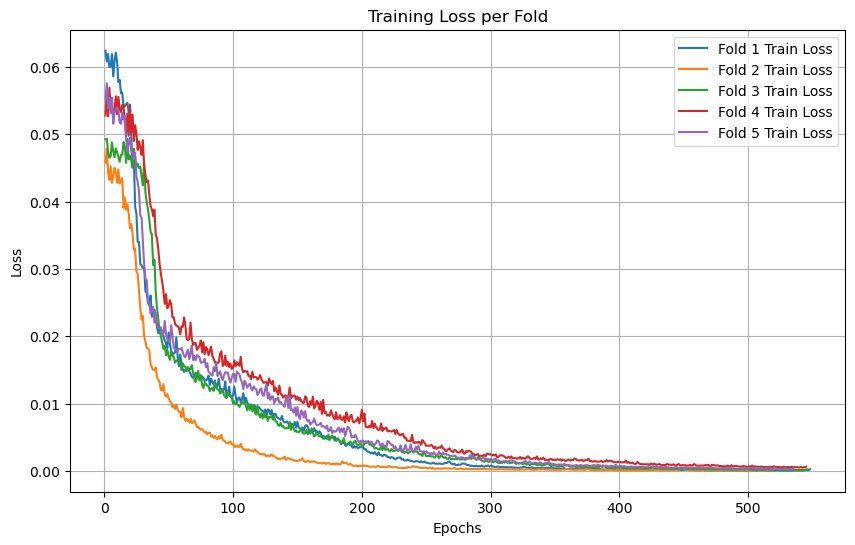

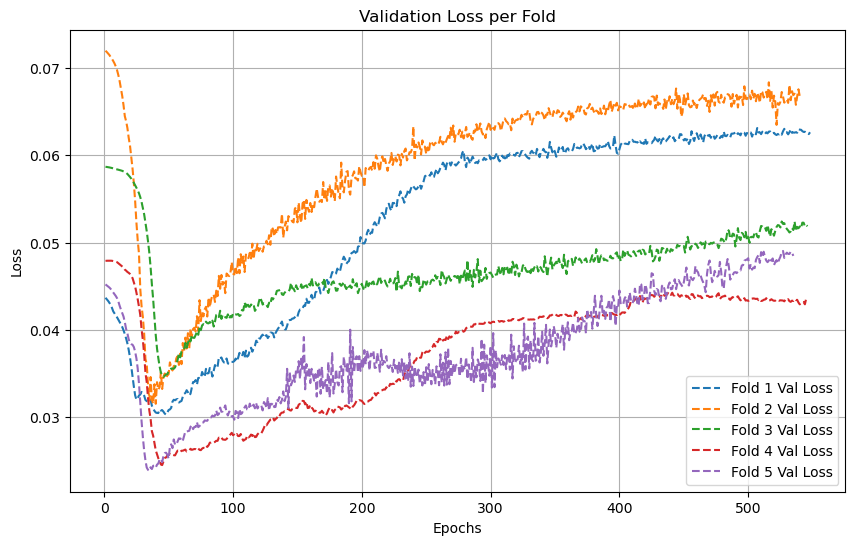

In [18]:
import matplotlib.pyplot as plt
plot_loss_curves_separately(cv_histories)


In [19]:
import os

# Define the directory where models will be saved
save_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\cosine_delta'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save each fold's best model to the directory
for i, model_state in enumerate(best_models):
    save_path = os.path.join(save_dir, f'best_model_fold_{i+1}.pth')
    torch.save(model_state, save_path)

print(f"Models saved to {save_dir}")

Models saved to C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\cosine_delta


In [43]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import torch.nn as nn

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()  # Output size changed to 1
        )
        
    def forward(self, x):
        return self.model(x).squeeze(1)  # Squeeze to get shape [batch_size]

    
    # Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the directory where models are saved
load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\cosine_delta'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join(load_dir, 'best_model_fold_5.pth')
model.load_state_dict(torch.load(load_path, map_location=device)) 
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")


Loaded model from C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\cosine_delta\best_model_fold_5.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_23212\955529967.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path, map_location=de

# Inference

In [37]:
# Load training features
exploded40_day7 = torch.load('exploded40_day7.pt')
exploded40_day10 = torch.load('exploded40_day10.pt')


C:\Users\k54739\AppData\Local\Temp\ipykernel_23212\2674064639.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  exploded40_day7 = torch.load('exploded40_day7.pt')
C:\Users

In [38]:
# Ensure the shapes are consistent
assert exploded40_day7.shape == exploded40_day10.shape, "Feature tensors must have the same shape."

In [39]:
import torch
import torch.nn.functional as F

# Compute cosine similarity for each pair of feature vectors across day 7 and day 10
exp_cosine_similarity = F.cosine_similarity(exploded40_day7, exploded40_day10, dim=1)  # Shape: [130]

# Convert cosine similarity to cosine distance
exp_cosine_distances = 1 - exp_cosine_similarity  # Shape: [130]

print(exp_cosine_distances)


tensor([0.5741, 0.7788, 0.6183, 0.6398, 0.7829, 0.6954, 0.6962, 0.7067, 0.6753,
        0.7545, 0.7000, 0.6538, 0.6949, 0.6127, 0.6441, 0.7281, 0.6849, 0.7743,
        0.6965, 0.6677, 0.7199, 0.7881, 0.7768, 0.7218, 0.7524, 0.6819, 0.7462,
        0.6722, 0.6485, 0.6106, 0.7351, 0.6870, 0.5714, 0.8043, 0.5858, 0.7456,
        0.7451, 0.7131, 0.5530, 0.6925])


In [40]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

exploded40_day7_scaled = (exploded40_day7 - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute min and max of the labels
labels_min = cosine_distances.min()  # Minimum value in the tensor
labels_max = cosine_distances.max()
print(labels_min) 
print(labels_max) # Maximum value in the tensor

# Apply Min-Max scaling
labels_scaled = (exp_cosine_distances - labels_min) / (labels_max - labels_min)
print(labels_scaled.shape)

# Print the scaled labels
print("Min-Max Scaled Labels:")
print(labels_scaled)

# Verify the range of scaled labels
print("Scaled Min:", labels_scaled.min().item())
print("Scaled Max:", labels_scaled.max().item())



tensor(0.2495)
tensor(0.8714)
torch.Size([40])
Min-Max Scaled Labels:
tensor([0.5220, 0.8511, 0.5929, 0.6276, 0.8577, 0.7170, 0.7183, 0.7352, 0.6846,
        0.8119, 0.7244, 0.6501, 0.7162, 0.5840, 0.6345, 0.7695, 0.7001, 0.8438,
        0.7187, 0.6724, 0.7564, 0.8660, 0.8478, 0.7594, 0.8085, 0.6952, 0.7986,
        0.6797, 0.6416, 0.5805, 0.7808, 0.7035, 0.5176, 0.8920, 0.5407, 0.7977,
        0.7969, 0.7454, 0.4879, 0.7123])
Scaled Min: 0.4879198670387268
Scaled Max: 0.8920270204544067


In [49]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
exploded40_day7_scaled = exploded40_day7_scaled.to(device)
labels_scaled = labels_scaled.to(device)
print(exploded40_day7_scaled.shape)
print(labels_scaled.shape)


# Perform inference with the model
with torch.no_grad():
    predicted_cosine_distances = model(exploded40_day7_scaled)  # Shape: [N]


# Compute per-sample squared errors
squared_errors = (predicted_cosine_distances - labels_scaled) ** 2  # Shape: [40]

# Convert to NumPy or print directly
print("Per-sample squared errors:")
print(squared_errors)

# Average MSE (matches the result from nn.MSELoss)
average_mse = squared_errors.mean()
print(f"Average MSE: {average_mse.item()}")


torch.Size([40, 512])
torch.Size([40])
Per-sample squared errors:
tensor([4.2983e-02, 7.2735e-02, 1.7279e-02, 1.2424e-01, 7.5713e-03, 9.7551e-05,
        6.8531e-03, 4.8749e-03, 1.3283e-03, 1.6767e-01, 4.5914e-04, 1.4744e-02,
        4.9655e-03, 4.9076e-02, 1.3746e-02, 1.1854e-01, 1.4274e-04, 5.0048e-02,
        2.5368e-02, 1.8570e-02, 1.8859e-01, 7.5915e-04, 3.1265e-01, 1.7921e-01,
        2.5259e-01, 8.2613e-02, 1.9259e-03, 7.4273e-03, 5.2344e-03, 3.8672e-02,
        1.3305e-01, 2.0052e-03, 1.6861e-03, 3.7697e-01, 6.4324e-02, 6.0968e-02,
        6.1613e-02, 5.8979e-04, 5.3009e-03, 1.8878e-02], device='cuda:0')
Average MSE: 0.06340845674276352


# single dose

In [50]:
# Load training features
sd_day7 = torch.load('inference_sd_day7.pt')
sd_day10 = torch.load('inference_sd_day10.pt')

C:\Users\k54739\AppData\Local\Temp\ipykernel_23212\3014836348.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd_day7 = torch.load('inference_sd_day7.pt')
C:\Users\k5473

In [53]:
sd_day7.shape

torch.Size([29, 512])

In [51]:
# Compute cosine similarity for each pair of feature vectors across day 7 and day 10
sd_cosine_similarity = F.cosine_similarity(sd_day7, sd_day10, dim=1)  # Shape: [130]

# Convert cosine similarity to cosine distance
sd_cosine_distances = 1 - sd_cosine_similarity  # Shape: [130]

print(sd_cosine_distances)


tensor([0.7013, 0.5946, 0.6402, 0.6828, 0.4199, 0.6537, 0.6483, 0.6266, 0.6303,
        0.6794, 0.6595, 0.7280, 0.7584, 0.6891, 0.7121, 0.7331, 0.5101, 0.8288,
        0.7375, 0.6893, 0.6608, 0.6195, 0.5771, 0.6945, 0.5022, 0.6765, 0.6062,
        0.7421, 0.7332])


In [55]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

sd_day7_scaled = (sd_day7 - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute min and max of the labels
labels_min = cosine_distances.min()  # Minimum value in the tensor
labels_max = cosine_distances.max()
print(labels_min) 
print(labels_max) # Maximum value in the tensor

# Apply Min-Max scaling
sd_labels_scaled = (sd_cosine_distances - labels_min) / (labels_max - labels_min)
print(sd_labels_scaled.shape)

# Print the scaled labels
print("Min-Max Scaled Labels:")
print(sd_labels_scaled)

# Verify the range of scaled labels
print("Scaled Min:", sd_labels_scaled.min().item())
print("Scaled Max:", sd_labels_scaled.max().item())



tensor(0.2495)
tensor(0.8714)
torch.Size([29])
Min-Max Scaled Labels:
tensor([0.7264, 0.5549, 0.6283, 0.6968, 0.2740, 0.6499, 0.6412, 0.6064, 0.6123,
        0.6912, 0.6592, 0.7694, 0.8182, 0.7069, 0.7439, 0.7775, 0.4190, 0.9315,
        0.7846, 0.7072, 0.6614, 0.5950, 0.5268, 0.7155, 0.4063, 0.6866, 0.5736,
        0.7920, 0.7777])
Scaled Min: 0.2739658057689667
Scaled Max: 0.9314518570899963


In [58]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
sd_day7_scaled = sd_day7_scaled.to(device)
sd_labels_scaled = sd_labels_scaled.to(device)
print(sd_day7_scaled.shape)
print(sd_labels_scaled.shape)


# Perform inference with the model
with torch.no_grad():
    sd_predicted_cosine = model(sd_day7_scaled)  # Shape: [N]


# Compute per-sample squared errors
sd_squared_errors = (sd_predicted_cosine - sd_labels_scaled) ** 2  # Shape: [40]

# Convert to NumPy or print directly
print("Per-sample squared errors:")
print(sd_squared_errors)
print(sd_squared_errors.shape)

# Average MSE (matches the result from nn.MSELoss)
sd_average_mse = sd_squared_errors.mean()
print(f"Average MSE: {sd_average_mse.item()}")


torch.Size([29, 512])
torch.Size([29])
Per-sample squared errors:
tensor([0.2355, 0.2648, 0.2190, 0.2330, 0.0184, 0.2139, 0.3066, 0.0643, 0.3029,
        0.2741, 0.3180, 0.0922, 0.4476, 0.2214, 0.0547, 0.5044, 0.0822, 0.0425,
        0.3005, 0.0387, 0.2639, 0.3091, 0.1847, 0.2638, 0.0736, 0.2505, 0.1862,
        0.5267, 0.5047], device='cuda:0')
torch.Size([29])
Average MSE: 0.23440240323543549


In [59]:
# control

In [60]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')


C:\Users\k54739\AppData\Local\Temp\ipykernel_23212\2729202165.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [62]:
# Compute cosine similarity for each pair of feature vectors across day 7 and day 10
control_cosine_similarity = F.cosine_similarity(train_day7_feats, train_day10_feats, dim=1)  # Shape: [130]

# Convert cosine similarity to cosine distance
control_cosine_distances = 1 - control_cosine_similarity  # Shape: [130]

print(control_cosine_distances)
print(control_cosine_distances.shape)


tensor([0.5880, 0.7093, 0.6559, 0.6997, 0.4229, 0.7312, 0.4352, 0.4787, 0.6559,
        0.2913, 0.6959, 0.6575, 0.6444, 0.6218, 0.6580, 0.7395, 0.5107, 0.7644,
        0.6774, 0.5982, 0.7426, 0.5138, 0.5830, 0.7501, 0.7628, 0.6736, 0.7110,
        0.7674, 0.6414, 0.4260, 0.8236, 0.5344, 0.6930, 0.7430, 0.7041, 0.6671,
        0.4982, 0.5235, 0.6558, 0.4406, 0.6724, 0.5822, 0.4679, 0.6856, 0.5288,
        0.5875, 0.6262, 0.6355, 0.3031, 0.6908, 0.6476, 0.7415, 0.5761, 0.3338,
        0.5630, 0.4760, 0.7289, 0.6408, 0.7405, 0.7604, 0.4700, 0.6241, 0.5748,
        0.5667, 0.6754, 0.3722, 0.7009, 0.5669, 0.4328, 0.4260, 0.8190, 0.4274,
        0.4175, 0.5257, 0.2941, 0.7312, 0.4310, 0.6867, 0.8714, 0.5887, 0.7310,
        0.5747, 0.6185, 0.6248, 0.3933, 0.2495, 0.5004, 0.7483, 0.6519, 0.7271,
        0.4719, 0.3401, 0.6500, 0.4878, 0.6590, 0.7822, 0.4397, 0.4886, 0.7895,
        0.6030, 0.4026, 0.7237, 0.7225, 0.5592, 0.6866, 0.4557, 0.6058, 0.5481,
        0.6582, 0.6437, 0.8111, 0.5641, 

In [63]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

control_day7_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute min and max of the labels
labels_min = cosine_distances.min()  # Minimum value in the tensor
labels_max = cosine_distances.max()
print(labels_min) 
print(labels_max) # Maximum value in the tensor

# Apply Min-Max scaling
control_labels_scaled = (control_cosine_distances - labels_min) / (labels_max - labels_min)
print(control_labels_scaled.shape)

# Print the scaled labels
print("Min-Max Scaled Labels:")
print(control_labels_scaled)

# Verify the range of scaled labels
print("Scaled Min:", control_labels_scaled.min().item())
print("Scaled Max:", control_labels_scaled.max().item())



tensor(0.2495)
tensor(0.8714)
torch.Size([130])
Min-Max Scaled Labels:
tensor([0.5443, 0.7392, 0.6534, 0.7239, 0.2789, 0.7745, 0.2986, 0.3685, 0.6534,
        0.0671, 0.7177, 0.6560, 0.6349, 0.5987, 0.6568, 0.7879, 0.4199, 0.8280,
        0.6880, 0.5607, 0.7928, 0.4249, 0.5362, 0.8050, 0.8253, 0.6819, 0.7421,
        0.8328, 0.6301, 0.2838, 0.9231, 0.4581, 0.7131, 0.7934, 0.7310, 0.6715,
        0.3999, 0.4405, 0.6532, 0.3073, 0.6799, 0.5349, 0.3512, 0.7012, 0.4490,
        0.5435, 0.6057, 0.6207, 0.0862, 0.7096, 0.6401, 0.7911, 0.5252, 0.1356,
        0.5041, 0.3642, 0.7708, 0.6292, 0.7894, 0.8215, 0.3546, 0.6024, 0.5230,
        0.5100, 0.6847, 0.1973, 0.7258, 0.5103, 0.2947, 0.2838, 0.9158, 0.2860,
        0.2701, 0.4441, 0.0717, 0.7746, 0.2919, 0.7030, 1.0000, 0.5453, 0.7742,
        0.5229, 0.5933, 0.6034, 0.2313, 0.0000, 0.4034, 0.8021, 0.6470, 0.7680,
        0.3576, 0.1457, 0.6440, 0.3832, 0.6585, 0.8566, 0.3058, 0.3844, 0.8682,
        0.5683, 0.2462, 0.7625, 0.7606, 0.4979, 0

In [64]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
control_day7_scaled = control_day7_scaled.to(device)
control_labels_scaled = control_labels_scaled.to(device)
print(control_day7_scaled.shape)
print(control_labels_scaled.shape)


# Perform inference with the model
with torch.no_grad():
    control_predicted_cosine = model(control_day7_scaled)  # Shape: [N]


# Compute per-sample squared errors
control_squared_errors = (control_predicted_cosine - control_labels_scaled) ** 2  # Shape: [40]

# Convert to NumPy or print directly
print("Per-sample squared errors:")
print(control_squared_errors)
print(control_squared_errors.shape)

# Average MSE (matches the result from nn.MSELoss)
control_average_mse = control_squared_errors.mean()
print(f"Average MSE: {control_average_mse.item()}")


torch.Size([130, 512])
torch.Size([130])
Per-sample squared errors:
tensor([1.2794e-05, 1.0130e-02, 8.0398e-03, 7.9565e-06, 1.5798e-06, 1.8923e-06,
        2.5846e-06, 1.1268e-05, 9.5045e-06, 7.4092e-05, 3.2647e-06, 6.6456e-08,
        1.1711e-05, 1.3378e-06, 4.0987e-02, 1.8645e-05, 1.6634e-06, 3.1750e-05,
        1.0444e-06, 4.8425e-07, 9.8995e-02, 3.3719e-02, 1.7435e-06, 1.1402e-06,
        2.7026e-06, 1.8507e-05, 4.6740e-07, 1.3177e-04, 4.2988e-13, 9.9433e-02,
        4.4096e-03, 5.8704e-07, 1.9515e-06, 4.6280e-05, 3.1081e-06, 1.4153e-05,
        2.1459e-06, 7.1852e-02, 1.2176e-06, 8.6989e-06, 1.9152e-06, 3.9355e-06,
        5.1505e-06, 1.8475e-06, 9.2878e-08, 2.9927e-07, 2.1196e-07, 1.5609e-03,
        1.9817e-04, 3.1949e-06, 1.4946e-04, 5.4117e-07, 9.2170e-02, 3.5089e-04,
        1.1553e-05, 1.0169e-06, 1.0935e-02, 4.8908e-06, 1.2603e-03, 1.0492e-05,
        1.2110e-02, 1.5830e-05, 2.3773e-06, 4.9728e-06, 6.2009e-06, 3.3394e-05,
        3.8324e-06, 5.7826e-07, 1.5554e-06, 1.1368e-

In [66]:

exp_squared_errors = squared_errors
print(exp_squared_errors.shape)

torch.Size([40])


In [67]:
control_squared_errors.shape


torch.Size([130])

In [68]:
sd_squared_errors.shape

torch.Size([29])

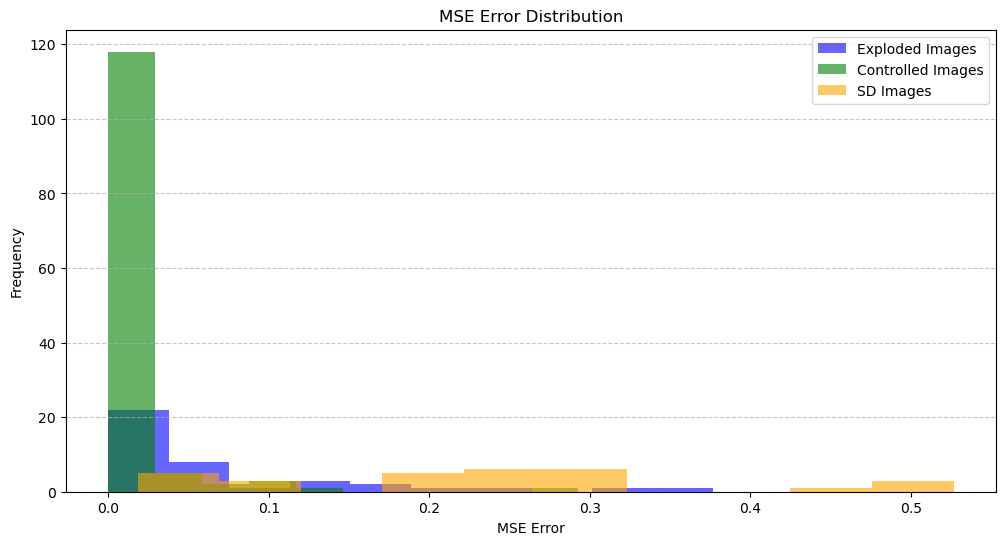

In [70]:
import matplotlib.pyplot as plt

# Move tensors to CPU and convert to NumPy
exp_squared_errors_np = exp_squared_errors.cpu().numpy()  # Convert to NumPy
control_squared_errors_np = control_squared_errors.cpu().numpy()  # Convert to NumPy
sd_squared_errors_np = sd_squared_errors.cpu().numpy()  # Convert to NumPy

# Plot histogram distributions
plt.figure(figsize=(12, 6))

plt.hist(exp_squared_errors_np, bins=10, alpha=0.6, label="Exploded Images", color="blue")
plt.hist(control_squared_errors_np, bins=10, alpha=0.6, label="Controlled Images", color="green")
plt.hist(sd_squared_errors_np, bins=10, alpha=0.6, label="SD Images", color="orange")

plt.title("MSE Error Distribution")
plt.xlabel("MSE Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [37]:
mse_values_tensor.shape

torch.Size([40])

In [38]:
mse_values_tensor

tensor([1.4091, 1.1505, 0.9111, 0.7111, 0.9247, 2.3538, 1.8863, 1.5517, 1.0155,
        1.1341, 1.0722, 1.0915, 1.4367, 2.2058, 2.6702, 3.6934, 0.6553, 1.5398,
        2.0486, 1.4953, 1.3870, 1.0119, 2.3756, 1.7842, 2.5670, 1.1263, 2.1728,
        1.6637, 2.1734, 0.8434, 2.3941, 2.6087, 2.1836, 1.8263, 0.7064, 2.3577,
        1.3882, 1.6260, 2.3828, 1.6836])

In [31]:
import pandas as pd

# Create a DataFrame with the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances  # List of Cosine distances
}
df = pd.DataFrame(data)

file_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\explod.csv"  

# Save to a CSV file
df.to_csv(file_path, index=False)  # Save without an index column


In [ ]:
# batch wise is more accurate take that next time.

In [33]:
# Batched inference
with torch.no_grad():
    predicted_labels = model(exp_feats_tensor_scaled)  # Shape: [batch_size, 512]

# Compute metrics in batch
# Mean Squared Error (MSE) for each sample
batch_mse_values = ((predicted_labels - labels_tensor_normalized) ** 2).mean(dim=1).tolist()  # Compute MSE for each sample

# Euclidean distance for each sample
batch_euclidean_distances = torch.norm(predicted_labels - labels_tensor_normalized, p=2, dim=1).tolist()

# Cosine distance for each sample
batch_cosine_distances = (1 - F.cosine_similarity(predicted_labels, labels_tensor_normalized, dim=1)).tolist()


In [44]:
batch_mse_values[0]

1.409135103225708

In [40]:
batch_mse_values == mse_values_tensor

False

In [35]:
euclidean_distances_tensor == batch_euclidean_distances

False

In [36]:
cosine_distances_tensor == batch_cosine_distances

False

In [2]:
import torch

In [7]:
# Load training features
sd_day7 = torch.load('inference_sd_day7.pt')
sd_day10 = torch.load('inference_sd_day10.pt')

C:\Users\k54739\AppData\Local\Temp\ipykernel_26900\3014836348.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd_day7 = torch.load('inference_sd_day7.pt')
C:\Users\k5473

In [8]:
# Ensure the shapes are consistent
assert sd_day10.shape == sd_day7.shape, "Feature tensors must have the same shape."
# Print lengths of feature tensors
print(f"Number of training Day 7 features: {len(sd_day7)}")
print(f"Number of training Day 10 features: {len(sd_day10)}")
# Print shapes of feature tensors
print(f"Shape of training Day 7 features: {sd_day7.shape}")
print(f"Shape of training Day 10 features: {sd_day10.shape}")

Number of training Day 7 features: 29
Number of training Day 10 features: 29
Shape of training Day 7 features: torch.Size([29, 512])
Shape of training Day 10 features: torch.Size([29, 512])


In [9]:
# Compute delta (target labels)
delta_sd = sd_day10 - sd_day7  # Element-wise difference

# Prepare data for training
sd_feats = sd_day7  # Input: Day 7 feature vectors (Shape: [130, 512])
sd_labels = delta_sd   
print(f"Shape of input features (Day 7): {sd_feats.shape}")
print(f"Shape of target labels (Delta): {sd_labels.shape}")



Shape of input features (Day 7): torch.Size([29, 512])
Shape of target labels (Delta): torch.Size([29, 512])


In [13]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')
# Compute delta (target labels)
delta_feats = train_day10_feats - train_day7_feats  # Element-wise difference

# Prepare data for training
features = train_day7_feats  # Input: Day 7 feature vectors (Shape: [130, 512])
labels = delta_feats   


C:\Users\k54739\AppData\Local\Temp\ipykernel_26900\3328128239.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [14]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

features_tensor_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = delta_feats.mean(dim=0, keepdim=True)  # Mean for each label dimension
labels_std = delta_feats.std(dim=0, keepdim=True)  # Standard deviation for each label dimension

labels_tensor_normalized = (delta_feats - labels_mean) / labels_std 

In [16]:
sd_feats_scaled = (sd_feats - features_min) / (features_max - features_min)
sd_labels_normalized = (sd_labels - labels_mean) / labels_std 

In [22]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import os


In [23]:
class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)
    
    # Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the directory where models are saved
load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join(load_dir, 'best_model_fold_1.pth')
model.load_state_dict(torch.load(load_path))
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")


Loaded model from C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\best_model_fold_1.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_26900\1203716035.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


In [24]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
sd_feats_scaled = sd_feats_scaled.to(device)
sd_labels_normalized = sd_labels_normalized.to(device)

# Initialize the MSE loss function
mse_loss_fn = nn.MSELoss()

# Lists to store metrics for each feature vector
mse_values = []
euclidean_distances = []
cosine_distances = []

# Loop through each feature vector
for i in range(sd_feats_scaled.shape[0]):
    sd_feats = sd_feats_scaled[i].unsqueeze(0)  # Shape: [1, 512]
    sd_labels = sd_labels_normalized[i].unsqueeze(0)  # Shape: [1, 512]
    
    # Get prediction
    with torch.no_grad():
        predicted_sd_labels = model(sd_feats)
    
    # Compute MSE for this feature vector
    mse = mse_loss_fn(predicted_sd_labels, sd_labels).item()
    mse_values.append(mse)
    
    # Compute Euclidean distance
    euclidean_distance = torch.norm(predicted_sd_labels - sd_labels, p=2).item()
    euclidean_distances.append(euclidean_distance)
    
    # Compute Cosine distance
    cosine_distance = 1 - F.cosine_similarity(predicted_sd_labels, sd_labels, dim=1).item()
    cosine_distances.append(cosine_distance)

# Convert metrics to tensors for statistical calculations
mse_values_tensor = torch.tensor(mse_values)
euclidean_distances_tensor = torch.tensor(euclidean_distances)
cosine_distances_tensor = torch.tensor(cosine_distances)




In [25]:
import pandas as pd

# Create a DataFrame with the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances  # List of Cosine distances
}
df = pd.DataFrame(data)

file_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\sd.csv"  

# Save to a CSV file
df.to_csv(file_path, index=False)  # Save without an index column


In [ ]:
# turn into func

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def compute_metrics_per_vector(model, input_features, target_labels, device='cpu'):
    """
    Compute MSE, Euclidean, and Cosine distances for each feature vector.

    Args:
    - model (torch.nn.Module): The trained model used for prediction.
    - input_features (torch.Tensor): Scaled input feature tensor of shape [N, D], where N is the number of samples and D is the feature size.
    - target_labels (torch.Tensor): Normalized labels tensor of shape [N, D].
    - device (str): The device to perform computations on ('cpu' or 'cuda').

    Returns:
    - mse_values_tensor (torch.Tensor): Tensor containing MSE values for each feature vector.
    - euclidean_distances_tensor (torch.Tensor): Tensor containing Euclidean distances for each feature vector.
    - cosine_distances_tensor (torch.Tensor): Tensor containing Cosine distances for each feature vector.
    """
    # Ensure the tensors and model are on the correct device
    model = model.to(device)
    input_features = input_features.to(device)
    target_labels = target_labels.to(device)

    # Set model to evaluation mode
    model.eval()

    # Initialize the MSE loss function
    mse_loss_fn = nn.MSELoss()

    # Lists to store metrics for each feature vector
    mse_values = []
    euclidean_distances = []
    cosine_distances = []

    # Loop through each feature vector
    for i in range(input_features.shape[0]):
        current_feats = input_features[i].unsqueeze(0)  # Shape: [1, D]
        current_labels = target_labels[i].unsqueeze(0)  # Shape: [1, D]

        # Get prediction
        with torch.no_grad():
            predicted_labels = model(current_feats)

        # Compute MSE for this feature vector
        mse = mse_loss_fn(predicted_labels, current_labels).item()
        mse_values.append(mse)

        # Compute Euclidean distance
        euclidean_distance = torch.norm(predicted_labels - current_labels, p=2).item()
        euclidean_distances.append(euclidean_distance)

        # Compute Cosine distance
        cosine_distance = 1 - F.cosine_similarity(predicted_labels, current_labels, dim=1).item()
        cosine_distances.append(cosine_distance)

    # Convert metrics to tensors for statistical calculations
    mse_values_tensor = torch.tensor(mse_values)
    euclidean_distances_tensor = torch.tensor(euclidean_distances)
    cosine_distances_tensor = torch.tensor(cosine_distances)

    return mse_values_tensor, euclidean_distances_tensor, cosine_distances_tensor

# Example usage:
# Assume model, sd_feats_scaled, sd_labels_normalized, and device are already defined
mse_values, euclidean_distances, cosine_distances = compute_metrics_per_vector(model, sd_feats_scaled, sd_labels_normalized, device=device)


# control

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Load training features
train_day7_feats = torch.load('train_day7_control.pt')
train_day10_feats = torch.load('train_day10_control.pt')


C:\Users\k54739\AppData\Local\Temp\ipykernel_25364\2729202165.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_day7_feats = torch.load('train_day7_control.pt')
C:\U

In [4]:
# Compute delta (target labels)
delta_feats = train_day10_feats - train_day7_feats  # Element-wise difference

# Prepare data for training
features = train_day7_feats  # Input: Day 7 feature vectors (Shape: [130, 512])
labels = delta_feats   
print(f"Shape of input features (Day 7): {features.shape}")
print(f"Shape of target labels (Delta): {labels.shape}")



Shape of input features (Day 7): torch.Size([130, 512])
Shape of target labels (Delta): torch.Size([130, 512])


In [8]:
# Compute Min-Max Scaling for Features
features_min = train_day7_feats.min(dim=0, keepdim=True).values  # Minimum value for each feature
features_max = train_day7_feats.max(dim=0, keepdim=True).values  # Maximum value for each feature

train_feats_scaled = (train_day7_feats - features_min) / (features_max - features_min)  # Scale to [0, 1]

# Compute Z-Score Normalization for Labels
labels_mean = delta_feats.mean(dim=0, keepdim=True)  # Mean for each label dimension
labels_std = delta_feats.std(dim=0, keepdim=True)  # Standard deviation for each label dimension

train_labels_normalized = (delta_feats - labels_mean) / labels_std 

In [6]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import os


In [7]:
class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)
    
    # Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the directory where models are saved
load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join(load_dir, 'best_model_fold_1.pth')
model.load_state_dict(torch.load(load_path))
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")


Loaded model from C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\best_model_fold_1.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_25364\1203716035.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def compute_metrics_per_vector(model, input_features, target_labels, device='cuda'):
    """
    Compute MSE, Euclidean, and Cosine distances for each feature vector.

    Args:
    - model (torch.nn.Module): The trained model used for prediction.
    - input_features (torch.Tensor): Scaled input feature tensor of shape [N, D], where N is the number of samples and D is the feature size.
    - target_labels (torch.Tensor): Normalized labels tensor of shape [N, D].
    - device (str): The device to perform computations on ('cpu' or 'cuda').

    Returns:
    - mse_values_tensor (torch.Tensor): Tensor containing MSE values for each feature vector.
    - euclidean_distances_tensor (torch.Tensor): Tensor containing Euclidean distances for each feature vector.
    - cosine_distances_tensor (torch.Tensor): Tensor containing Cosine distances for each feature vector.
    """
    # Ensure the tensors and model are on the correct device
    model = model.to(device)
    input_features = input_features.to(device)
    target_labels = target_labels.to(device)

    # Set model to evaluation mode
    model.eval()

    # Initialize the MSE loss function
    mse_loss_fn = nn.MSELoss()

    # Lists to store metrics for each feature vector
    mse_values = []
    euclidean_distances = []
    cosine_distances = []

    # Loop through each feature vector
    for i in range(input_features.shape[0]):
        current_feats = input_features[i].unsqueeze(0)  # Shape: [1, D]
        current_labels = target_labels[i].unsqueeze(0)  # Shape: [1, D]

        # Get prediction
        with torch.no_grad():
            predicted_labels = model(current_feats)

        # Compute MSE for this feature vector
        mse = mse_loss_fn(predicted_labels, current_labels).item()
        mse_values.append(mse)

        # Compute Euclidean distance
        euclidean_distance = torch.norm(predicted_labels - current_labels, p=2).item()
        euclidean_distances.append(euclidean_distance)

        # Compute Cosine distance
        cosine_distance = 1 - F.cosine_similarity(predicted_labels, current_labels, dim=1).item()
        cosine_distances.append(cosine_distance)

    # Convert metrics to tensors for statistical calculations
    #mse_values_tensor = torch.tensor(mse_values)
    #euclidean_distances_tensor = torch.tensor(euclidean_distances)
    #cosine_distances_tensor = torch.tensor(cosine_distances)

    return mse_values, euclidean_distances, cosine_distances, 

# Example usage:
# Assume model, sd_feats_scaled, sd_labels_normalized, and device are already defined
mse_values, euclidean_distances, cosine_distances = compute_metrics_per_vector(model, train_feats_scaled, train_labels_normalized, device=device)


In [19]:
import pandas as pd

# Create a DataFrame with the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances  # List of Cosine distances
}
df = pd.DataFrame(data)

file_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction\control.csv"  

# Save to a CSV file
df.to_csv(file_path, index=False)  # Save without an index column


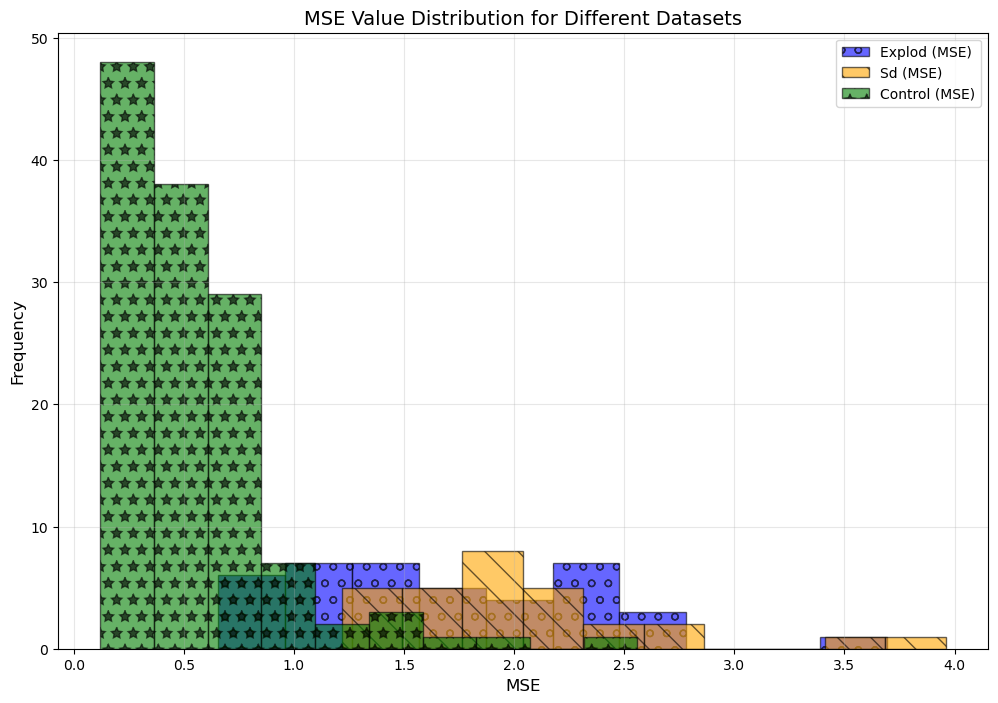

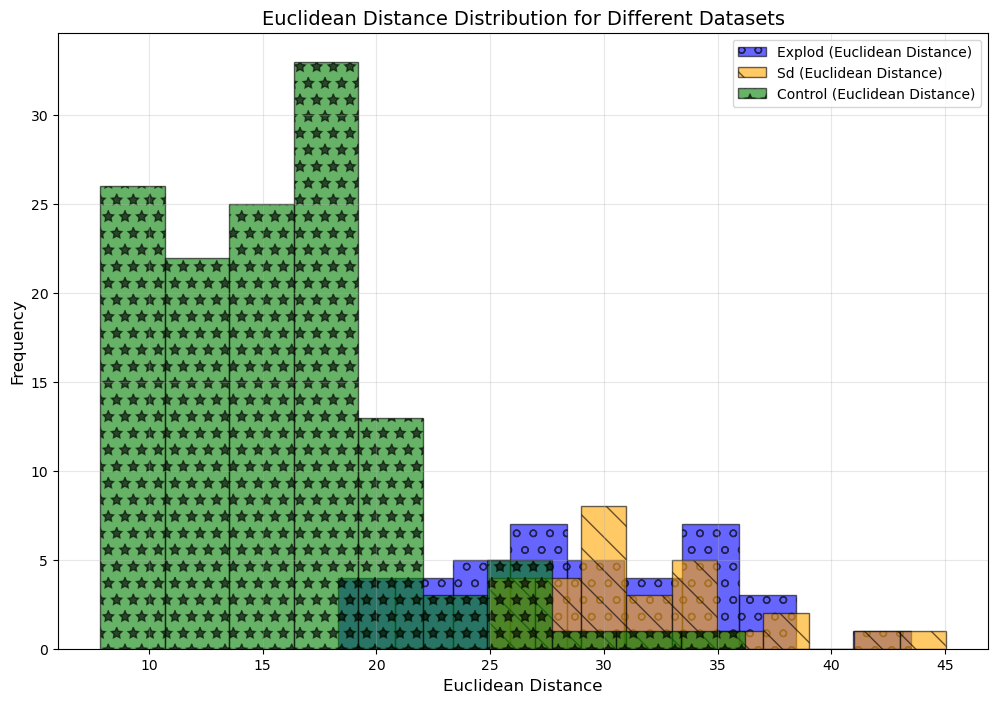

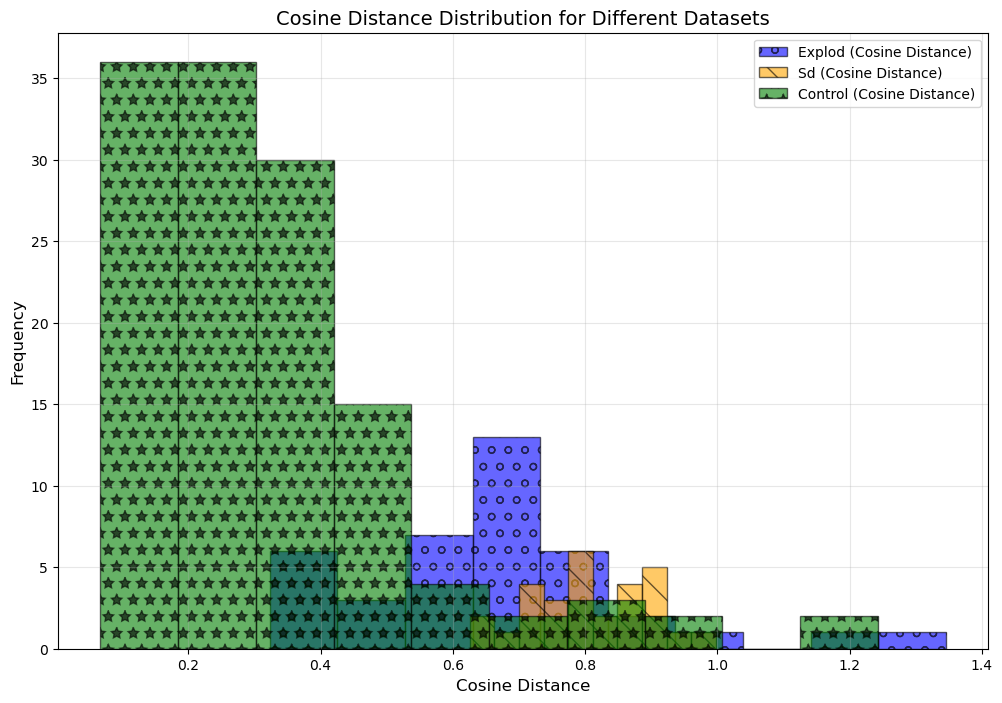

In [22]:
import matplotlib.pyplot as plt
import torch
import pandas as pd

folder_path = r"C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled\delta_prediction"

# Load datasets
datasets = {
    "explod": pd.read_csv(os.path.join(folder_path, "explod.csv")),
    "sd": pd.read_csv(os.path.join(folder_path, "sd.csv")),
    "control": pd.read_csv(os.path.join(folder_path, "control.csv"))
}

# Prepare metrics
metrics = {
    "MSE": "MSE",
    "Euclidean Distance": "Euclidean Distance",
    "Cosine Distance": "Cosine Distance"
}

# Define colors and hatching patterns for each dataset
colors = {"explod": "blue", "sd": "orange", "control": "green"}
hatch_styles = {"explod": "o", "sd": "\\", "control": "*"}

# Plotting function
def plot_metric_distribution(metrics, title, xlabel, metric_key, bins=20):
    plt.figure(figsize=(12, 8))
    
    # Plot each dataset
    for dataset_name, df in datasets.items():
        values = df[metric_key].tolist()
        plt.hist(
            values,
            bins=bins,
            alpha=0.6,
            label=f"{dataset_name.capitalize()} ({metric_key})",
            color=colors[dataset_name],
            hatch=hatch_styles[dataset_name],
            edgecolor="black"
        )
    
    # Customize plot
    plt.title(f"{title} for Different Datasets", fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

# Plot MSE, Euclidean, and Cosine Distance distributions
plot_metric_distribution(metrics, "MSE Value Distribution", "MSE", "MSE", bins=10)
plot_metric_distribution(metrics, "Euclidean Distance Distribution", "Euclidean Distance", "Euclidean Distance", bins=10)
plot_metric_distribution(metrics, "Cosine Distance Distribution", "Cosine Distance", "Cosine Distance", bins=10)
